In [ ]:
# SENIOR DESIGN PROJECT - ROAD ROUGHNESS MAPPING
# MODEL IMPLEMENTED USING ACCELEROMETER DATA POINTS

# Sources Cited

# https://morioh.com/p/11031c93a346
# https://stackoverflow.com/questions/57422734/how-to-merge-multiple-json-files-into-one-file-in-python
# https://blog.finxter.com/python-scipy-signal-find_peaks/

# Installing pyrebase module

%pip install pyrebase

import pyrebase
import json
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import plotly.express as px
from scipy.signal import find_peaks
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing Json files as Pandas dataframes and concatenating them

Combined_dataset = pd.DataFrame()

for i in range(5):
  df = pd.read_json('Data'+ str(i+1) + '.json')
  Combined_dataset = pd.concat([Combined_dataset, df.T], axis=0)



In [ ]:
# Test

print(len(Combined_dataset))
print(len(Combined_dataset.columns))
#display(Combined_dataset)

2964
6


In [ ]:
graph_data = Combined_dataset.loc[:, ['x', 'y', 'z']]

In [ ]:
display(graph_data)

,x,y,z
2023-03-31 09:55:05.972338,-0.167166,0.067178,-0.139314
2023-03-31 09:55:07.149434,0.139114,0.105186,0.050876
2023-03-31 09:55:08.345941,0.090711,0.024495,0.092009
2023-03-31 09:55:09.532030,-0.153994,-0.08546,-0.133401
2023-03-31 09:55:10.708925,-0.139029,-0.027598,-0.121374
...,...,...,...
2023-04-05 10:23:58.597882,0.035985,-0.586306,1.29518
2023-04-05 10:23:59.771699,0.145472,0.725343,0.374637
2023-04-05 10:24:00.954772,-0.050117,0.189108,-0.581068
2023-04-05 10:24:02.129027,0.008651,0.068208,-0.758428


In [ ]:
graph_data = graph_data.set_axis(list(range(0, len(Combined_dataset))), axis="index")
display(graph_data)

,x,y,z
0,-0.167166,0.067178,-0.139314
1,0.139114,0.105186,0.050876
2,0.090711,0.024495,0.092009
3,-0.153994,-0.08546,-0.133401
4,-0.139029,-0.027598,-0.121374
...,...,...,...
2959,0.035985,-0.586306,1.29518
2960,0.145472,0.725343,0.374637
2961,-0.050117,0.189108,-0.581068
2962,0.008651,0.068208,-0.758428


In [ ]:
fig = px.scatter_3d(graph_data, x='x', y='y', z='z',
                    title="3D Scatter Plot")
fig.show()

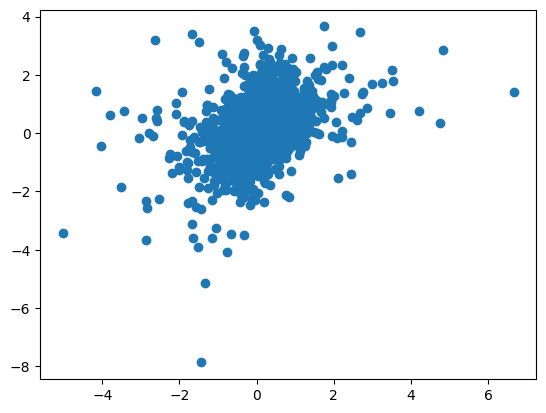

In [ ]:
plt.scatter(graph_data['x'], graph_data['z'])

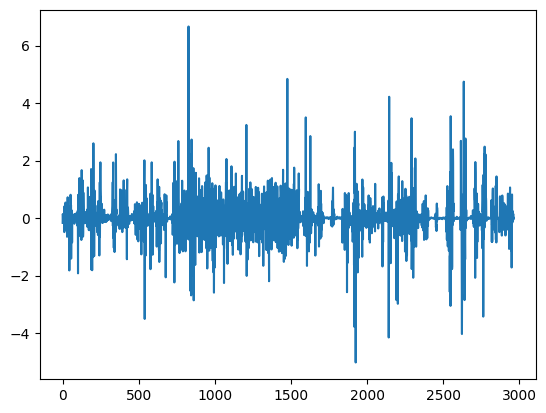

In [ ]:
labelx = range(0, len(Combined_dataset))
plt.plot(labelx, graph_data['x'])

In [ ]:
# Creating a dataframe with only x-axis accelerometer values
# Applying absolute function to every point

x_data = graph_data.loc[:, ['x']]
x_data = x_data.abs()

display(x_data)
display(x_data.iloc[0, 0])

,x
0,0.167166
1,0.139114
2,0.090711
3,0.153994
4,0.139029
...,...
2959,0.035985
2960,0.145472
2961,0.050117
2962,0.008651


0.16716620922088601

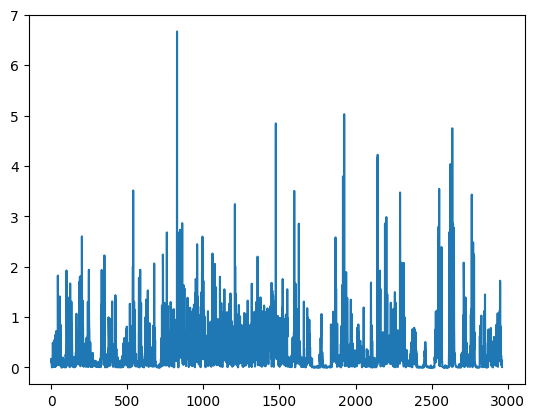

In [ ]:
labelx = range(0, len(Combined_dataset))
plt.plot(labelx, x_data)

In [ ]:
y = x_data['x'].to_numpy()
len(y)

2964

In [ ]:
# Finding the threshold for the z peak algorithm using iterative selection method

# Finding peak magnitudes in the x-axis accelerometer values

peaks = find_peaks(y, height=0.8)
height = peaks[1]['peak_heights'] #list containing the height of the peaks
peak_pos = peaks[0]    #list containing the positions of the peaks 

display(peak_pos)
display(height)
len(height)

array([  44,   52,   56,   62,  101,  110,  125,  133,  136,  166,  187,
        189,  194,  196,  198,  202,  207,  209,  241,  244,  248,  329,
        332,  336,  341,  350,  377,  386,  398,  401,  420,  422,  424,
        497,  517,  534,  537,  539,  545,  547,  577,  579,  585,  591,
        618,  624,  633,  635,  646,  670,  677,  728,  732,  734,  737,
        740,  745,  752,  760,  768,  785,  790,  800,  804,  807,  818,
        820,  827,  835,  838,  841,  844,  847,  850,  853,  856,  859,
        861,  867,  871,  873,  875,  896,  898,  902,  909,  913,  916,
        936,  938,  946,  948,  950,  952,  959,  964,  974,  979,  983,
        986,  988,  991,  994, 1000, 1004, 1007, 1030, 1041, 1053, 1057,
       1060, 1073, 1076, 1081, 1083, 1086, 1095, 1107, 1109, 1113, 1118,
       1127, 1138, 1154, 1163, 1169, 1171, 1174, 1178, 1185, 1201, 1207,
       1209, 1214, 1221, 1226, 1233, 1241, 1252, 1269, 1272, 1277, 1284,
       1287, 1289, 1291, 1309, 1313, 1318, 1323, 13

array([1.8239185 , 0.80994436, 1.41055623, 0.84787513, 1.92432559,
       1.38977363, 1.66736994, 1.30696099, 0.88517622, 1.06551212,
       1.70516286, 1.79926548, 1.81615372, 1.27701638, 1.3650219 ,
       2.60110685, 1.32630022, 0.96318443, 1.30213962, 1.24385031,
       1.93860278, 1.24751921, 1.93490936, 1.03521061, 1.18278116,
       2.22396913, 0.99640481, 0.96808349, 0.86694566, 1.31072451,
       0.98668672, 1.43380209, 1.34731588, 0.81003606, 1.26427602,
       0.82699848, 2.00876735, 3.51196473, 1.3059779 , 1.1516315 ,
       1.7802557 , 0.86507821, 1.938764  , 1.27697841, 0.99297132,
       1.34640757, 1.13381625, 1.52913897, 0.87957387, 0.8289518 ,
       2.0630589 , 1.22905617, 0.97164899, 2.24119732, 0.90287464,
       0.90694774, 1.28222853, 0.89160861, 2.6802909 , 1.2183363 ,
       1.29925053, 1.15845408, 0.95797637, 0.82238214, 1.15769764,
       0.94696268, 0.87244403, 6.66733367, 1.28976433, 2.52758822,
       2.21238942, 2.69146113, 2.73207889, 1.44039687, 0.97445

299

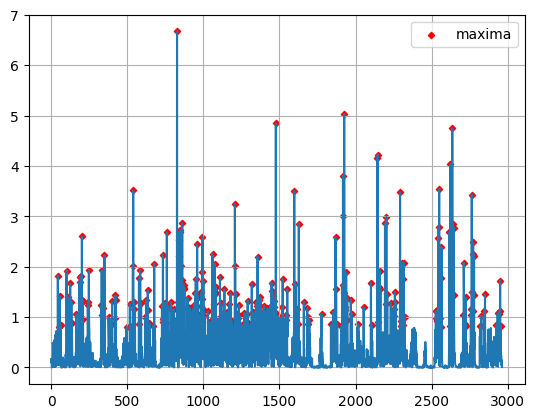

In [ ]:
# Plotting with peaks

fig = plt.figure()
ax = fig.subplots()
ax.plot(range(len(Combined_dataset)), x_data)
ax.scatter(peak_pos, height, color = 'r', s = 10, marker = 'D', label = 'maxima')
ax.legend()
ax.grid()
plt.show()

In [ ]:
# Finding initial threshold for iterative selection algorithm (choosing optimial value for z threshold)

knt=1
#thresh = height.mean()
thresh = np.median(height)

min_group = np.array([])
max_group = np.array([])

for i in range(len(height)):
  if height[i]<= thresh:
    min_group = np.append(min_group, height[i])
  else:
    max_group = np.append(max_group, height[i])

new_thresh = (min_group.mean() + max_group.mean())/2
#print(new_thresh)

# Updating threshold value till it converges

while abs(new_thresh-thresh)>0.001:
  min_group = np.array([])
  max_group = np.array([])
  knt=knt+1
  thresh = new_thresh

  for i in range(len(height)):
   if height[i]<= thresh:
     min_group = np.append(min_group, height[i])
   else:
     max_group = np.append(max_group, height[i])
  
  new_thresh = (min_group.mean() + max_group.mean())/2
  #print(new_thresh)

In [ ]:
threshold = new_thresh
test_data = Combined_dataset.loc[:, ['x', 'y', 'z', 'lat', 'long']]
display(test_data)
print(len(test_data))
print(knt)

,x,y,z,lat,long
2023-03-31 09:55:05.972338,-0.167166,0.067178,-0.139314,42.349998,-71.106834
2023-03-31 09:55:07.149434,0.139114,0.105186,0.050876,42.349999,-71.106836
2023-03-31 09:55:08.345941,0.090711,0.024495,0.092009,42.349999,-71.106827
2023-03-31 09:55:09.532030,-0.153994,-0.08546,-0.133401,42.35,-71.106826
2023-03-31 09:55:10.708925,-0.139029,-0.027598,-0.121374,42.349999,-71.106821
...,...,...,...,...,...
2023-04-05 10:23:58.597882,0.035985,-0.586306,1.29518,NaN,NaN
2023-04-05 10:23:59.771699,0.145472,0.725343,0.374637,NaN,NaN
2023-04-05 10:24:00.954772,-0.050117,0.189108,-0.581068,42.344144,-71.101709
2023-04-05 10:24:02.129027,0.008651,0.068208,-0.758428,NaN,NaN


2964
8


In [ ]:
# Apply z peak algorithm
#knt=0
predictions = pd.DataFrame(columns=['Latitude', 'Longitude'])

for i in range(len(test_data)):
  #knt=knt+1
  if abs(test_data.iloc[i, 0]) > threshold:
    predictions = predictions.append({'Latitude': test_data.iloc[i, 3], 'Longitude': test_data.iloc[i, 4]}, ignore_index=True)





<ipython-input-23-1a468f7c8f4e>:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-23-1a468f7c8f4e>:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-23-1a468f7c8f4e>:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-23-1a468f7c8f4e>:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-23-1a468f7c8f4e>:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-23-1a468f7c8f4e>:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [ ]:
display(predictions)
print(threshold)
#print(knt)

,Latitude,Longitude
0,42.346269,-71.102897
1,42.345428,-71.104475
2,42.347487,-71.098279
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,42.352320,-71.114549
8,42.352736,-71.115343
9,NaN,NaN


2.1624962093739275
